<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) 데이터 불러오기 및 데이터 선택

In [3]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/abalone (3).csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [4]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [5]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=156)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [6]:
#필요한 모듈 불러오기
# 여기서부터 320p 시작
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [20]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha = 0.3)

#예측값 구하기
ridge.fit(X_train, y_train)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
predict = ridge.predict(X_test)

#MSE와 RMSE구하기
neg_mse_scores = cross_val_score(ridge, X_test, y_test, scoring = "neg_mean_squared_error")
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' RMSE scores : ', np.round(rmse_scores, 3))
print(' 평균 RMSE : {0:.3f} '.format(avg_rmse))

 Negative MSE scores :  [-4.829 -4.943 -4.833 -5.144 -4.602]
 RMSE scores :  [2.198 2.223 2.198 2.268 2.145]
 평균 RMSE : 2.206 


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [16]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [21]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = "neg_mean_squared_error")
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 평균 RMSE : 2.193 
alpha 0.1 일 때 평균 RMSE : 2.193 
alpha 1 일 때 평균 RMSE : 2.212 
alpha 10 일 때 평균 RMSE : 2.365 
alpha 100 일 때 평균 RMSE : 2.625 


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [36]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

In [40]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/abalone (3).csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [41]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=156)

In [47]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True


4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [42]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor(n_estimators = 1000)

#예측값 구하기
xgb_reg.fit(X_train, y_train)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
predict_xfb = xgb_reg.predict(X_test)

#MSE와 RMSE 구하기
neg_mse_scores = cross_val_score(xgb_reg, X_test, y_test, scoring = "neg_mean_squared_error")
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' RMSE scores : ', np.round(rmse_scores, 3))
print(' 평균 RMSE : {0:.3f} '.format(avg_rmse))

[09:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Negative MSE scores :  [-5.305 -5.4   -5.938 -6.431 -5.522]
 RMSE scores :  [2.303 2.324 2.437 2.536 2.35 ]
 평균 RMSE : 2.390 


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

[10:02:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


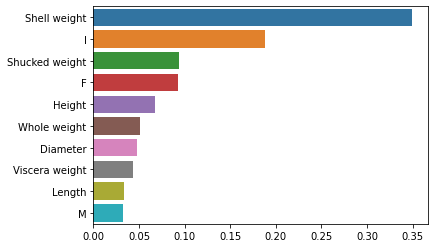

In [50]:
import seaborn as sns
%matplotlib inline

xgb_reg = XGBRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터셋을 적용해 학습  
xgb_reg.fit(X_train, y_train)

feature_series = pd.Series(data = xgb_reg.feature_importances_, index = data.columns)
feature_series = feature_series.sort_values(ascending = False) # 내림차순
sns.barplot(x = feature_series, y = feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [22]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [23]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [24]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [32]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [33]:
#기울기
lr_clf.coef_

array([[-1.99751167e-01,  3.65450552e-01,  1.49472112e-01,
        -1.88027149e-01, -2.28495646e-02,  1.95456485e-01,
         4.66701265e-01, -1.66796661e-02,  8.23897101e-02,
         6.75011473e-02, -1.92621856e-02,  2.94915749e-01,
         7.42524049e-03],
       [ 5.96475829e-01, -7.88672591e-01, -1.26181429e-01,
         2.12254654e-01, -1.13504800e-02,  3.15785912e-01,
         3.55147976e-01,  3.34675580e-02,  2.79035669e-01,
        -1.17202474e+00,  2.61165677e-01,  4.64731544e-01,
        -8.33633158e-03],
       [-3.96724662e-01,  4.23222039e-01, -2.32906833e-02,
        -2.42275051e-02,  3.42000446e-02, -5.11242396e-01,
        -8.21849241e-01, -1.67878919e-02, -3.61425379e-01,
         1.10452359e+00, -2.41903492e-01, -7.59647293e-01,
         9.11091084e-04]])

In [34]:
#절편
lr_clf.intercept_

array([-0.04177837,  0.09551046, -0.05373209])

3-3) 모델의 정확도를 구하세요.

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score
#모델의 예측값 구하기
lr_preds = lr_clf.predict(x_test)

#모델의 정확도 구하기
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
# print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy : 0.963
